### The goal of this project is to predict the house price.

In [2]:
#NBVAL_CHECK_OUTPUT
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model
import sklearn.preprocessing as sklp
from sklearn.cross_validation import train_test_split
import statsmodels.api as sm
from scipy.stats import norm
from scipy import stats
%matplotlib inline

/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/anaconda/lib/python2.7/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


# 1. Import the data into Pandas

In [3]:
#NBVAL_CHECK_OUTPUT
data_train = pd.read_csv('/Users/carlicema/Documents/gitub_desktop/House-Price-Prediction/train.csv')

In [4]:
#NBVAL_CHECK_OUTPUT
data_train.columns

Index([u'Id', u'MSSubClass', u'MSZoning', u'LotFrontage', u'LotArea',
       u'Street', u'Alley', u'LotShape', u'LandContour', u'Utilities',
       u'LotConfig', u'LandSlope', u'Neighborhood', u'Condition1',
       u'Condition2', u'BldgType', u'HouseStyle', u'OverallQual',
       u'OverallCond', u'YearBuilt', u'YearRemodAdd', u'RoofStyle',
       u'RoofMatl', u'Exterior1st', u'Exterior2nd', u'MasVnrType',
       u'MasVnrArea', u'ExterQual', u'ExterCond', u'Foundation', u'BsmtQual',
       u'BsmtCond', u'BsmtExposure', u'BsmtFinType1', u'BsmtFinSF1',
       u'BsmtFinType2', u'BsmtFinSF2', u'BsmtUnfSF', u'TotalBsmtSF',
       u'Heating', u'HeatingQC', u'CentralAir', u'Electrical', u'1stFlrSF',
       u'2ndFlrSF', u'LowQualFinSF', u'GrLivArea', u'BsmtFullBath',
       u'BsmtHalfBath', u'FullBath', u'HalfBath', u'BedroomAbvGr',
       u'KitchenAbvGr', u'KitchenQual', u'TotRmsAbvGrd', u'Functional',
       u'Fireplaces', u'FireplaceQu', u'GarageType', u'GarageYrBlt',
       u'GarageFinish',

# 2. Data cleaning

In [5]:
#NBVAL_CHECK_OUTPUT
#Check missing data
total_missing = data_train.isnull().sum().sort_values(ascending = False)
prop = (data_train.isnull().sum() / data_train.isnull().count()).sort_values(ascending = False) #calculate the proportion and then sort
missing_data = pd.concat([total_missing, prop], axis = 1, keys = ['Total Missing', 'Proportion'])
missing_data.head(20)

,Total Missing,Proportion
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageCond,81,0.055479
GarageType,81,0.055479
GarageYrBlt,81,0.055479
GarageFinish,81,0.055479


In [6]:
#NBVAL_CHECK_OUTPUT
#Drop the missing data
data_train = data_train.drop((missing_data[missing_data['Total Missing'] > 1]).index, 1)
data_train = data_train.drop(data_train[data_train['Electrical'].isnull()].index)

# 3. Transformation

In [23]:
#NBVAL_CHECK_OUTPUT
#Transform the neighborhood names into lowercase
lowercase = lambda x: x.lower()
data_train['Neighborhood'] = data_train['Neighborhood'].apply(lowercase)
data_train['Neighborhood'].head(5)

0    collgcr
1    veenker
2    collgcr
3    crawfor
4    noridge
Name: Neighborhood, dtype: object

# 4. Visualization

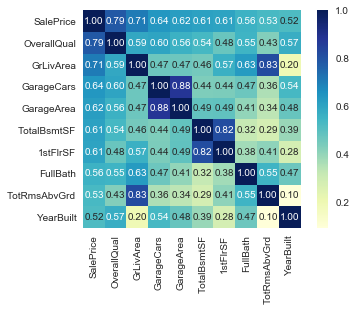

In [8]:
#Correlation visualization
#Only show the top 10 variables here
corrmap = data_train.corr() #NBVAL_CHECK_OUTPUT
columns = corrmap.nlargest(10, 'SalePrice')['SalePrice'].index #NBVAL_CHECK_OUTPUT
coff = np.corrcoef(data_train[columns].values.T) #NBVAL_CHECK_OUTPUT
heatmap = sns.heatmap(coff, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, cmap = 'YlGnBu', yticklabels=columns.values, xticklabels=columns.values)

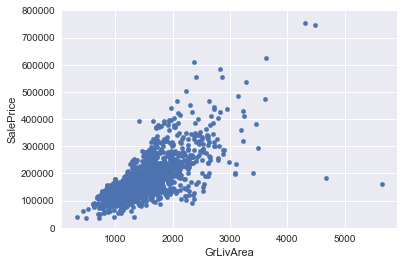

In [9]:
#Linear relationship analysis using scatter plot
#Selected variable = 'GrLivArea' 
data = pd.concat([data_train['SalePrice'], data_train['GrLivArea']], axis = 1) #NBVAL_CHECK_OUTPUT
data.plot.scatter(x = 'GrLivArea', y = 'SalePrice', ylim=(0,800000))

# 5. Normalization

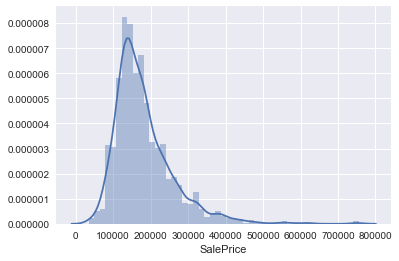

In [10]:
#Check the distribution of sale price and the selected variable
sns.distplot(data_train['SalePrice'])

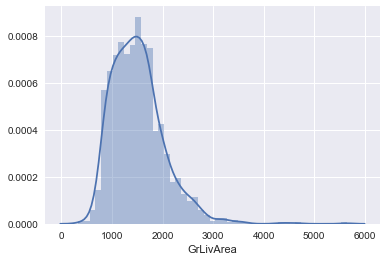

In [11]:
sns.distplot(data_train['GrLivArea'])

In [12]:
#NBVAL_CHECK_OUTPUT
#Normalized the data using log transformation
data_train['SalePrice'] = np.log(data_train['SalePrice'])
data_train['GrLivArea'] = np.log(data_train['GrLivArea'])

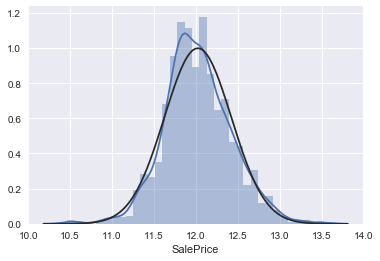

In [13]:
#Check the distribution after transformation
sns.distplot(data_train['SalePrice'], fit = norm)

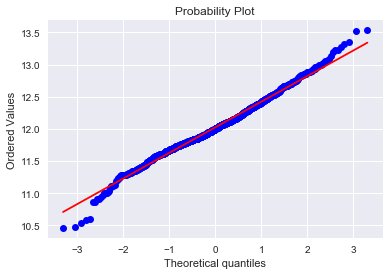

In [14]:
res_price = stats.probplot(data_train['SalePrice'], plot=plt)

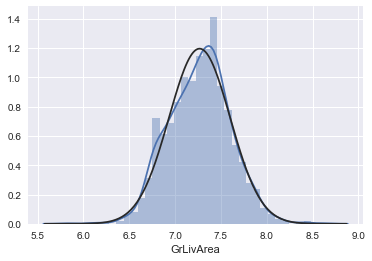

In [15]:
sns.distplot(data_train['GrLivArea'], fit = norm)

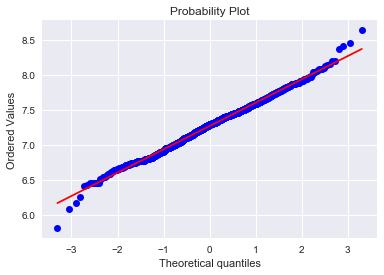

In [16]:
res_area = stats.probplot(data_train['GrLivArea'], plot=plt)

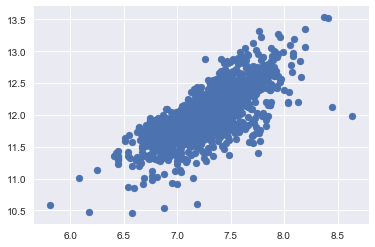

In [17]:
#Scatter plot after normalization
#The linear relationship between GrLivArea and SalePrice is clearer.
plt.scatter(data_train['GrLivArea'], data_train['SalePrice'])

# 6. Regression

In [18]:
#NBVAL_CHECK_OUTPUT
x = np.array(data_train['GrLivArea']).reshape(-1, 1)
y = np.array(data_train['SalePrice']).reshape(-1, 1)

In [19]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.7, random_state=None)
linreg = sm.GLS(y_test, x_test).fit()
print (linreg.summary())

                            GLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.999
Model:                            GLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 1.051e+06
Date:                Wed, 03 Jan 2018   Prob (F-statistic):               0.00
Time:                        13:12:41   Log-Likelihood:                -447.26
No. Observations:                1022   AIC:                             896.5
Df Residuals:                    1021   BIC:                             901.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             1.6529      0.002   1024.986      0.0

In [20]:
y_pred = linreg.predict(x_test)
print (y_pred)

[ 11.42135944  12.25180465  12.57038129 ...,  11.89687864  12.07387568
  10.99460286]


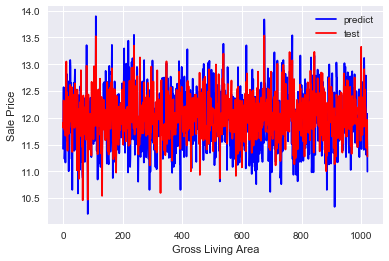

In [21]:
plt.figure()  
plt.plot(range(len(y_pred)),y_pred,'b',label="predict")  
plt.plot(range(len(y_pred)),y_test,'r',label="test")  
plt.legend(loc='upper right') 
plt.xlabel('Gross Living Area')
plt.ylabel('Sale Price') 
plt.show() 